In [1]:
from pipeline import FluxPipelineAttnMap, FluxAttnProcessor

In [ ]:
import torch 
import sys
from diffusers import FluxTransformer2DModel
from pathlib import Path
transformer_path = Path("../flux/flux/transformer/diffusion_pytorch_model.safetensors")
config_path = Path("../flux/flux/transformer/config.json")
model = FluxTransformer2DModel.from_single_file(
    str(transformer_path),  
    config=str(config_path),
    torch_dtype=torch.bfloat16,
)

dance_pipe = FluxPipelineAttnMap.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.bfloat16,     
    transformer=model, 
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [3]:
array = []
for module in dance_pipe.transformer.transformer_blocks:
    module.attn.processor = FluxAttnProcessor(array)

In [13]:
prompt = "A very happy man"

In [14]:
dance_pipe = dance_pipe.to("cuda:1")

In [15]:
images = dance_pipe(prompt)

  0%|          | 0/28 [00:00<?, ?it/s]

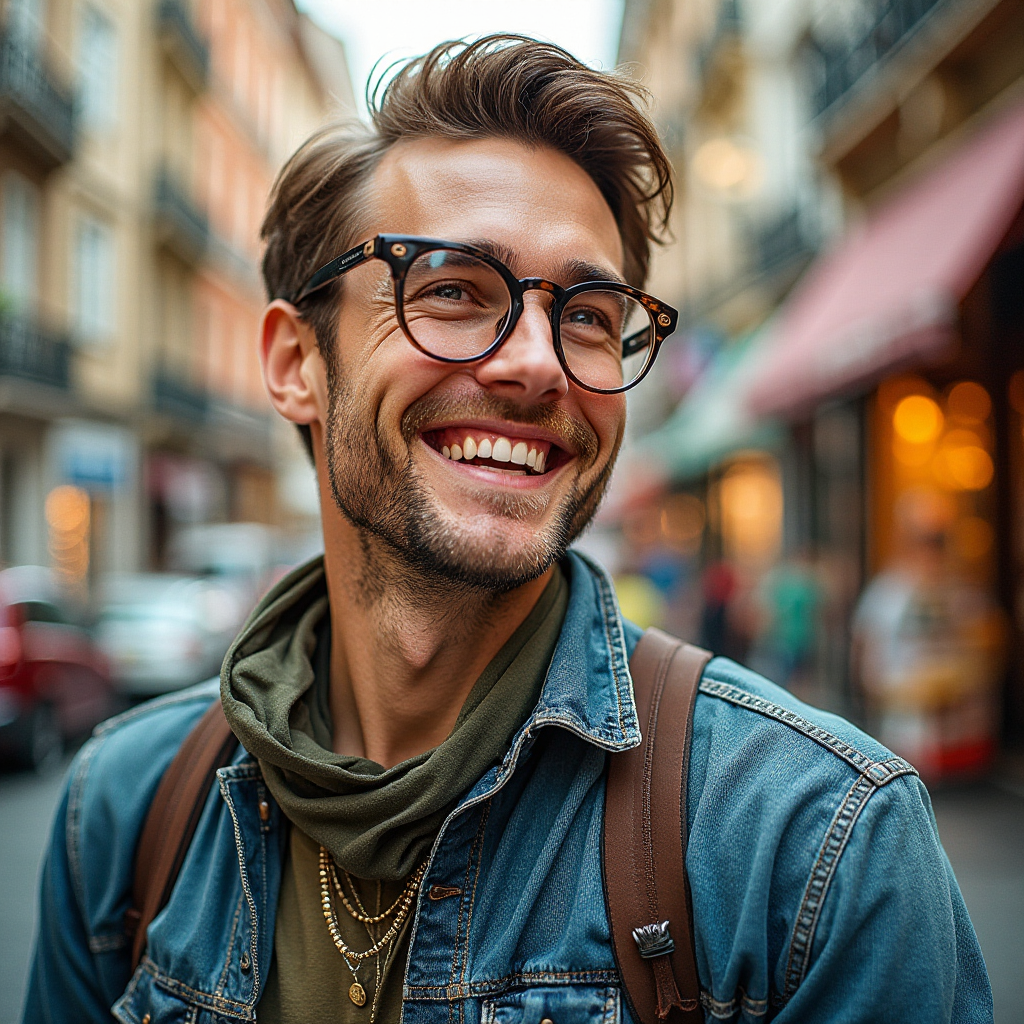

In [16]:
images.images[0]

In [17]:
maps = []
for module in dance_pipe.transformer.transformer_blocks:
    maps.extend([i.cpu() for i in module.attn.processor.ret])

In [18]:
maps = torch.stack(maps).mean((0,2))

In [19]:
tokens = dance_pipe.tokenizer.tokenize(prompt)

In [20]:
maps = maps[0,:len(tokens)]

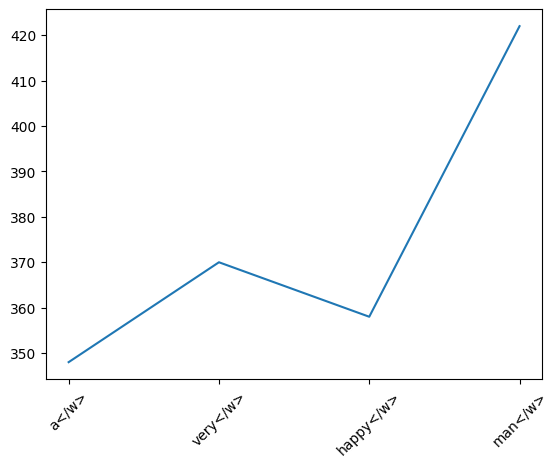

In [ ]:
import pylab
pylab.plot(maps.float().cpu().detach().numpy())
pylab.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)  
pylab.show() 